# - 파이썬 실습(프로그래머스)
## - '키패드 누르기' 문제 (2020 카카오 인턴십)
## - 문제:

스마트폰 전화 키패드의 각 칸에 다음과 같이 숫자들이 적혀 있습니다.
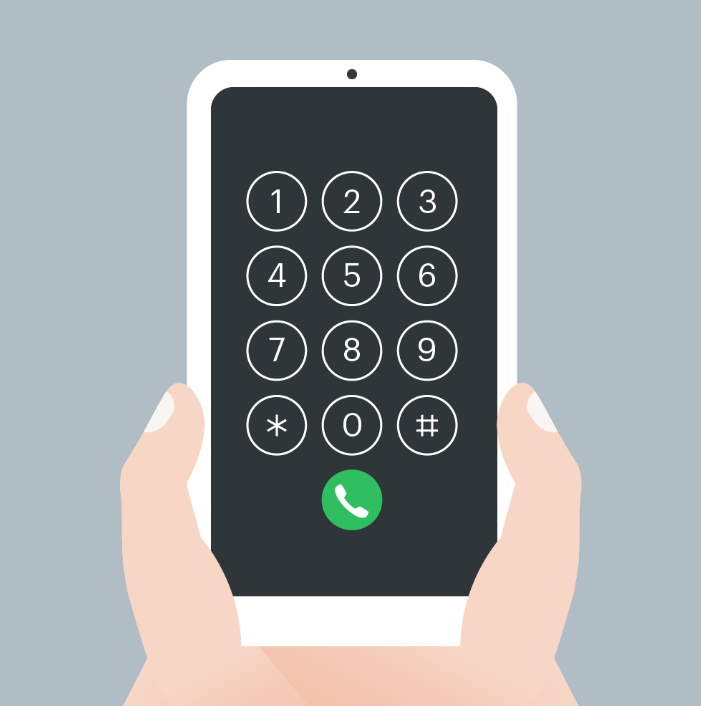

이 전화 키패드에서 왼손과 오른손의 엄지손가락만을 이용해서 숫자만을 입력하려고 합니다.

**맨 처음 왼손 엄지손가락은 * 키패드에 오른손 엄지손가락은 # 키패드 위치에서 시작하며, 엄지손가락을 사용하는 규칙은 다음과 같습니다.

1. 엄지손가락은 상하좌우 4가지 방향으로만 이동할 수 있으며 키패드 이동 한 칸은 거리로 1에 해당합니다.

2. 왼쪽 열의 3개의 숫자 1, 4, 7을 입력할 때는 왼손 엄지손가락을 사용합니다.

3. 오른쪽 열의 3개의 숫자 3, 6, 9를 입력할 때는 오른손 엄지손가락을 사용합니다.

4. 가운데 열의 4개의 숫자 2, 5, 8, 0을 입력할 때는 두 엄지손가락의 현재 키패드의 위치에서 더 가까운 엄지손가락을 사용합니다.

4-1. 만약 두 엄지손가락의 거리가 같다면, 오른손잡이는 오른손 엄지손가락, 왼손잡이는 왼손 엄지손가락을 사용합니다.

순서대로 누를 번호가 담긴 배열 numbers, 왼손잡이인지 오른손잡이인 지를 나타내는 문자열 hand가 매개변수로 주어질 때, 각 번호를 누른 엄지손가락이 왼손인 지 오른손인 지를 나타내는 연속된 문자열 형태로 return 하도록 solution 함수를 완성해주세요.

[제한사항]
- numbers 배열의 크기는 1 이상 1,000 이하입니다.
- numbers 배열 원소의 값은 0 이상 9 이하인 정수입니다.
- hand는 "left" 또는 "right" 입니다. "left"는 왼손잡이, "right"는 오른손잡이를 의미합니다.
- 왼손 엄지손가락을 사용한 경우는 L, 오른손 엄지손가락을 사용한 경우는 R을 순서대로 이어붙여 문자열 형태로 return 해주세요.

- 입출력 예

numbers: [1, 3, 4, 5, 8, 2, 1, 4, 5, 9, 5]

hand: "right"

-> result: "LRLLLRLLRRL"

In [ ]:
def solution(numbers, hand):
    answer = ''
    key_pad = {1 : (0,3), 2 : (1,3), 3 : (2,3),  
               4 : (0,2), 5 : (1,2), 6 : (2,2),
               7 : (0,1), 8 : (1,1), 9 : (2,1),
               "*" : (0,0), 0 : (1,0), "#" : (2,0)} 
    # 좌표를 만든다. "*"를 원점으로 했고, 가로가 x축, 세로가 y축이다.
    
    left_position = key_pad["*"] # 왼 엄지의 초기 위치
    right_position = key_pad["#"] # 오른 엄지의 초기 위치
    for i in numbers:
        if (i == 1 or i==4 or i==7): # 누를 번호가 1,4,7인 경우
            answer += "L" # 무조건 왼 엄지
            left_position = key_pad[i] # 왼 엄지의 이동
        elif(i==3 or i==6 or i==9): # 누를 번호가 3,6,9인 경우
            answer += "R" # 무조건 오른 엄지
            right_position = key_pad[i] # 오른 엄지의 이동
        else: # 2,5,8,0의 경우
            dist1 = 0
            dist2 = 0
            dist1 = abs(key_pad[i][0]-left_position[0]) + abs(key_pad[i][1]-left_position[1]) #왼 엄지와 누를 번호 사이의 거리
            dist2 = abs(key_pad[i][0]-right_position[0]) + abs(key_pad[i][1]-right_position[1]) # 오른 엄지와 누를 번호 사이의 거리
            if (dist1 > dist2): #왼 엄지가 더 멀면
                answer += "R" # 오른 엄지로 누르고
                right_position = key_pad[i] # 오른 엄지의 이동
            elif (dist1 < dist2): # 오른 엄지가 더 멀면
                answer += "L" # 왼 엄지로 누르고
                left_position = key_pad[i] # 왼 엄지의 이동
            else: # 거리가 동일한 경우 어느 손잡이냐에 따라 달라진다.
                if hand == "right": #오른손잡이
                    answer += "R" #오른 엄지로 누르고
                    right_position = key_pad[i] # 오른 엄지의 이동
                else: #왼손잡이
                    answer += "L" # 왼손 엄지로 누르고
                    left_position = key_pad[i] # 왼 엄지의 이동
           
    return answer

- 초기에는 좌표를 도입할 생각을 하지 못하였으나, 다른 분이 서술한 코드에서 좌표가 사용되는 것을 보고 힌트를 얻었다.
- 나는 "*" 를 원점으로 하여 좌표를 설정했다.
- 이동해야 할 거리 구하기(2,5,8,0을 눌러야 할 경우를 위해)

  : 현재 손의 위치 좌표가 (a,b), 누를 번호의 위치 좌표가 (c,d)라 할 때,   이동해야 할 거리는 다음과 같다.

  '이동해야 할 거리' = |a-c| + |b-d|

  이 문제에서 거리란, 상하좌우 이동만 가능한 경우의 이동거리라는 점을 기억하자. 그러면 당연히, 'x축에서의 거리차(x축 방향으로 이동해야 할 거리) + y축에서의 거리차(y축 방향으로 이동해야 할 거리)'가 총 이동해야 할 거리가 된다.

- 3가지의 경우로 나누었다.

  1 . 1,3,7을 눌러야 하는 경우: 무조건 왼엄지다. "L"이 답에 추가된다.

  2 . 3,6,9를 눌러야 하는 경우: 무조건 오른 엄지다. "R" 이 답에 추가된다.

  3 . 2,5,8,0을 눌러야 하는 경우:

  - 거리가 가까운 쪽 손의 엄지로 누른다. 거리는 위에서 서술한 방법으로 구하면 된다.

  - 거리가 동일한 경우, 어느 손잡이냐에 따라 달라진다. if, else를 추가로 써서 왼손잡이, 오른손잡이를 구별한다.


- 주의할 점

: or는 논리연산자(T/F연산)

: |는 비교 연산자(Bitwise연산).

: 이 문제에서 or 대신 |를 쓰면 오답이 된다.